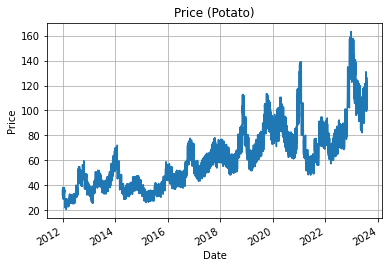

,Price
Date,
2023-07-27,123.47
2023-07-28,126.48
2023-07-29,103.81
2023-07-30,114.97
2023-07-31,101.36


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#--------Data manipulation-----------#

df = pd.read_excel('potato.xlsx')


#setting index
df.set_index(pd.Index(['Month','Day','Price']), inplace=True)

#transpose horizontal to vertical
df = df.T

#reset the index
df.reset_index(inplace=True)

df.rename(columns={'index': 'Year'}, inplace=True)

df['Year'].replace(r'^Unnamed.*', pd.NA, regex=True, inplace=True)
df['Year'].fillna(method='ffill', inplace=True)
df['Month'].fillna(method='ffill', inplace=True)


df['Day'] = df['Day'].astype(int)
df['Date'] = df['Year'].astype(str) + ' ' + df['Month'].astype(str) + ' ' + df['Day'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y %B %d')
df.set_index('Date', inplace=True)

#drops the column
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

df['Price'] = df['Price'].astype(float)
ts = pd.Series(data=df['Price'])

#ploting
ts.plot(title='Price (Potato)', xlabel='Date', ylabel='Price')
plt.autoscale()
plt.grid(which='both')
plt.show()

ts
df.tail()

In [3]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(ts)

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check if the p-value is less than the significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis; Time series is stationary")
else:
    print("Fail to reject the null hypothesis; Time series is non-stationary")


ADF Statistic: -1.8275108408163514
p-value: 0.3668913731583339
Fail to reject the null hypothesis; Time series is non-stationary


ADF Statistic after differencing: -28.866712961933576
p-value after differencing: 0.0


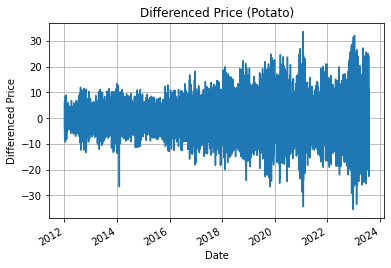

In [4]:
# First-order difference
ts_diff = ts.diff().dropna()

# Check stationarity again
result_diff = adfuller(ts_diff)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

# Plot differenced time series
ts_diff.plot(title='Differenced Price (Potato)', xlabel='Date', ylabel='Differenced Price')
plt.autoscale()
plt.grid(which='both')
plt.show()


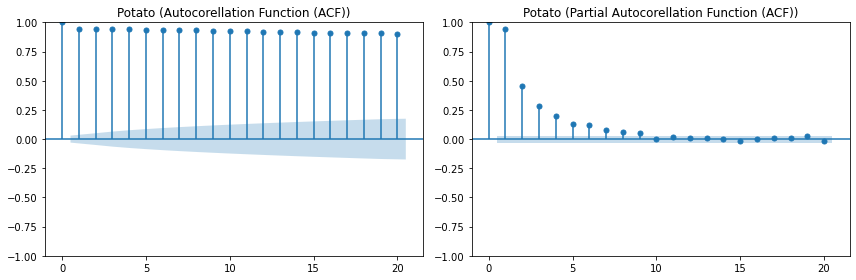

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF
plot_acf(ts, lags=20, ax=ax1)
ax1.set_title('Potato (Autocorellation Function (ACF))')

# PACF
plot_pacf(ts, lags=20, ax=ax2)
ax2.set_title('Potato (Partial Autocorellation Function (ACF))')

plt.tight_layout()
plt.show()


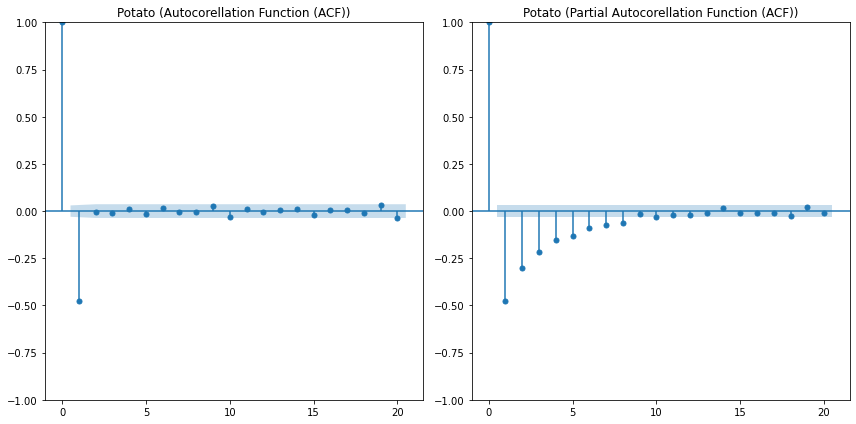

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Differencing the time series
ts_diff = ts.diff().dropna()

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(ts_diff, lags=20, ax=plt.gca())
plt.title('Potato (Autocorellation Function (ACF))')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(ts_diff, lags=20, ax=plt.gca())
plt.title('Potato (Partial Autocorellation Function (ACF))')

plt.tight_layout()
plt.show()


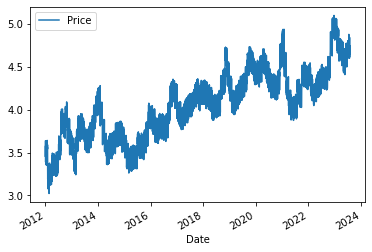

In [7]:
import numpy as np
df= np.log(df)
df.plot()

df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)  # Make sure the index is sorted

# Set frequency explicitly
df = df.asfreq('D')


# Monthly

In [8]:
from itertools import product
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Set frequency explicitly
df_monthly.index.freq = 'M'

# Fit the ARIMA model (replace with your chosen order)
order = (38,1,46)  # Example order, you may need to adjust this based on your data and analysis
model = sm.tsa.ARIMA(df_monthly['Price'], order=order)
results = model.fit()

# Forecast future values (replace steps with the number of steps you want to forecast)
forecast_steps = 12  # Assuming you want to forecast 12 months (1 year)
forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values, confidence intervals, and dates
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_dates = predicted_values.index

# Convert log-transformed values back to original scale
forecasted_values_original_scale = np.exp(predicted_values)

# Extract forecasted values as a list
forecasted_values_list = forecasted_values_original_scale.tolist()

print('Forecasted Values')
# Print the list of forecasted values with dates
for date, value in zip(forecast_dates, forecasted_values_list):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

mse = mean_squared_error(df_monthly['Price'], results.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_monthly['Price'], results.fittedvalues)
mape = np.mean(np.abs((df_monthly['Price'] - results.fittedvalues) / df_monthly['Price'])) * 100

print()
print('Error Metrics')
# Print the metrics as percentages
print(f'MSE: {mse:.2%}')
print(f'RMSE: {rmse:.2%}')
print(f'MAE: {mae:.2%}')
print(f'MAPE: {mape:.2f}%')



residuals = results.resid



Forecasted Values
2023-08-31: 128.30
2023-09-30: 137.15
2023-10-31: 150.69
2023-11-30: 165.02
2023-12-31: 177.10
2024-01-31: 158.65
2024-02-29: 127.00
2024-03-31: 123.70
2024-04-30: 122.21
2024-05-31: 113.25
2024-06-30: 98.57
2024-07-31: 125.39

Error Metrics
MSE: 9.42%
RMSE: 30.68%
MAE: 8.10%
MAPE: 2.13%


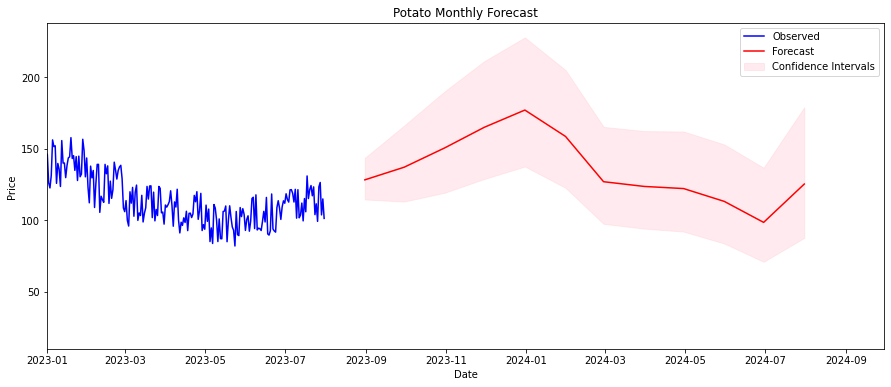

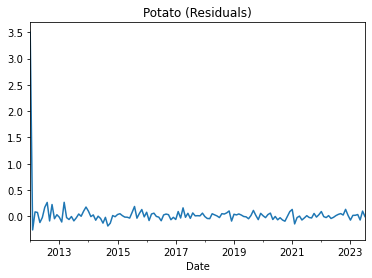

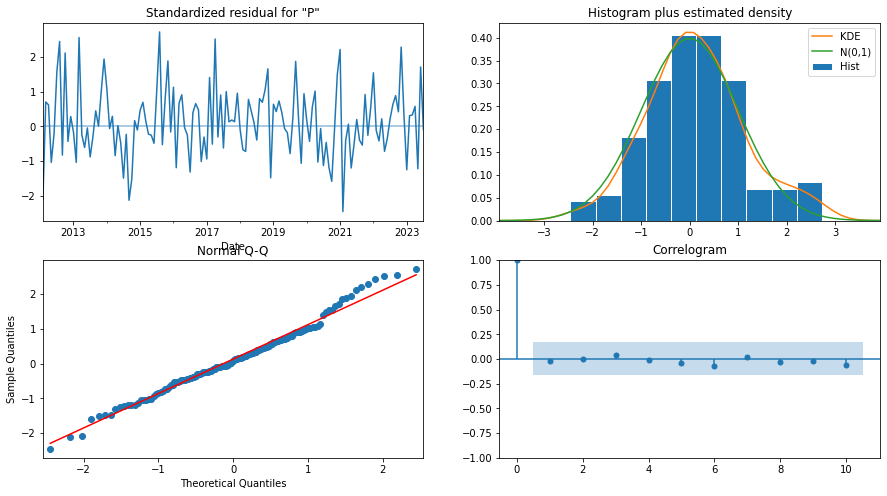

count    139.000000
mean       0.033841
std        0.306074
min       -0.259307
25%       -0.031656
50%        0.006680
75%        0.048572
max        3.500617
dtype: float64
Mean of Residuals: 0.03384069912731768


In [9]:
import matplotlib.pyplot as plt

# Plot the observed values

plt.figure(figsize=(15, 6))

plt.plot(ts, label='Observed', color='blue')

# Plot the forecasted values
plt.plot(predicted_values.index, forecasted_values_original_scale, label='Forecast', color='red')

# Add confidence intervals
confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, np.exp(confidence_intervals.iloc[:, 0]), np.exp(confidence_intervals.iloc[:, 1]), color='pink', alpha=0.3, label='Confidence Intervals')

#Potato Monthly Forecast plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Potato Monthly Forecast')
plt.xlim(pd.Timestamp('2023-01-01'), ts.index[-1] + pd.DateOffset(months=14))  # Increase x-axis limits

plt.show()

residuals.plot(title="Potato (Residuals)")
plt.show()

results.plot_diagnostics(figsize=(15, 8))
plt.show()

print(residuals.describe())

print(f"Mean of Residuals: {results.resid.mean()}")

In [10]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  139
Model:               ARIMA(38, 1, 46)   Log Likelihood                 172.391
Date:                Tue, 12 Dec 2023   AIC                           -174.783
Time:                        01:57:38   BIC                             74.034
Sample:                    01-31-2012   HQIC                           -73.670
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2260     54.214      0.004      0.997    -106.032     106.484
ar.L2         -0.3584     36.234     -0.010      0.992     -71.377      70.660
ar.L3         -0.0461     30.102     -0.002      0.9

# # Weekly

In [11]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Resample the data to weekly frequency and calculate the mean
df_weekly = df.resample('W').mean()

# Set frequency explicitly
df_weekly.index.freq = 'W'

df_weekly = df_weekly.fillna(method='ffill')

# Fit the ARIMA model (replace with your chosen order)
order = (38,1,46)  # Example order, you may need to adjust this based on your data and analysis
model = sm.tsa.ARIMA(df_weekly['Price'], order=order)
results = model.fit()

# Forecast future values (replace steps with the number of steps you want to forecast)
forecast_steps = 6  # Assuming you want to forecast 12 weeks (3 months)

forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values, confidence intervals, and dates
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_dates = forecast.predicted_mean.index

# Convert log-transformed values back to the original scale
forecasted_values_original_scale = np.exp(predicted_values)

# Extract forecasted values as a list
forecasted_values_list = forecasted_values_original_scale.tolist()

print('Forecasted Values (Weekly Frequency)')
# Print the list of forecasted values with dates
for date, value in zip(forecast_dates, forecasted_values_list):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

mse = mean_squared_error(df_weekly['Price'], results.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_weekly['Price'], results.fittedvalues)
mape = np.mean(np.abs((df_weekly['Price'] - results.fittedvalues) / df_weekly['Price'])) * 100

print()
print('Error Metrics')
# Print the metrics as percentages
print(f'MSE: {mse:.2%}')
print(f'RMSE: {rmse:.2%}')
print(f'MAE: {mae:.2%}')
print(f'MAPE: {mape:.2f}%')

residuals = results.resid


Forecasted Values (Weekly Frequency)
2023-08-13: 107.27
2023-08-20: 102.64
2023-08-27: 105.88
2023-09-03: 108.85
2023-09-10: 114.60
2023-09-17: 115.41

Error Metrics
MSE: 2.43%
RMSE: 15.58%
MAE: 4.91%
MAPE: 1.24%


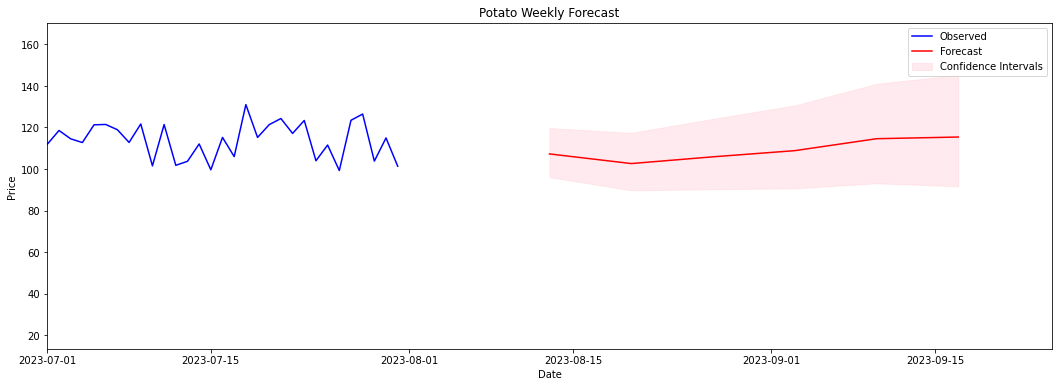

In [12]:
import matplotlib.pyplot as plt

# Plot the observed values
plt.figure(figsize=(18, 6))  # Increase the figure size

# Plot the observed values
plt.plot(ts, label='Observed', color='blue')

# Plot the forecasted values
plt.plot(predicted_values.index, forecasted_values_original_scale, label='Forecast', color='red')

# Add confidence intervals
confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, np.exp(confidence_intervals.iloc[:, 0]), np.exp(confidence_intervals.iloc[:, 1]), color='pink', alpha=0.3, label='Confidence Intervals')

# Carrots Weekly Forecast plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Set x-axis limits to start from July 2023
plt.xlim(pd.Timestamp('2023-07-01'), ts.index[-1] + pd.DateOffset(weeks=8))  # Increase x-axis limits

# Adjust y-axis limits if needed
#plt.ylim(0, max(ts.max(), forecasted_values_original_scale.max()) * 1.2)

plt.title('Potato Weekly Forecast')
plt.show()


In [13]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  606
Model:               ARIMA(38, 1, 46)   Log Likelihood                 878.163
Date:                Tue, 12 Dec 2023   AIC                          -1586.326
Time:                        01:59:38   BIC                          -1211.881
Sample:                    01-01-2012   HQIC                         -1440.616
                         - 08-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4115      1.064     -0.387      0.699      -2.496       1.673
ar.L2         -0.1823      0.829     -0.220      0.826      -1.806       1.442
ar.L3         -0.0195      0.817     -0.024      0.9

In [14]:
###############################################################################################################################